In [8]:
import pandas as pd
import seaborn as sb
import numpy as np

%matplotlib inline

sb.set_palette("Set3")

ImportError: No module named pandas

In [4]:
data = pd.read_csv("nov_19_results.csv", usecols=range(5))
data["error"] = data["error"].astype(float)
print(data[:10])
no_include = data.diseases != "linearsvmbalanced"
osd_ptosis = data[(data.diseases == "osd_ptosis")]
str_ptosis = data[(data.diseases == "str_ptosis")]
osd_str = data[(data.diseases == "osd_str")]

NameError: name 'pd' is not defined

In [5]:
# OSD PTOSIS
op1 = sb.factorplot(x="model", y="error",hue="eval_set",kind="bar", col="feature",  data=osd_ptosis, palette=eval_set_pal)
op1.set_xticklabels(rotation=60, ha='right')
plt.subplots_adjust(top=0.8)
op1.fig.suptitle('OSD and PTOSIS')

# STR PTOSIS
op2 = sb.factorplot(x="model", y="error",hue="eval_set",kind="bar", col="feature",  data=str_ptosis, palette=eval_set_pal)
op2.set_xticklabels(rotation=60,  ha='right')
plt.subplots_adjust(top=0.8)
op2.fig.suptitle('STRABISMUS and PTOSIS')


# OSD STR
op3 = sb.factorplot(x="model", y="error",hue="eval_set",kind="bar", col="feature",  data=osd_str, palette=eval_set_pal)
op3.set_xticklabels(rotation=60, ha='right')
plt.subplots_adjust(top=0.8)
op3.fig.suptitle('OSD and STRABISMUS')


NameError: name 'sb' is not defined

In [ ]:
op1.savefig('output/nov19_osd_ptosis.png')
op2.savefig('output/nov19_str_ptosis.png')
op3.savefig('output/nov19_osd_str.png')

/Users/zmaurer/anaconda/envs/python2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


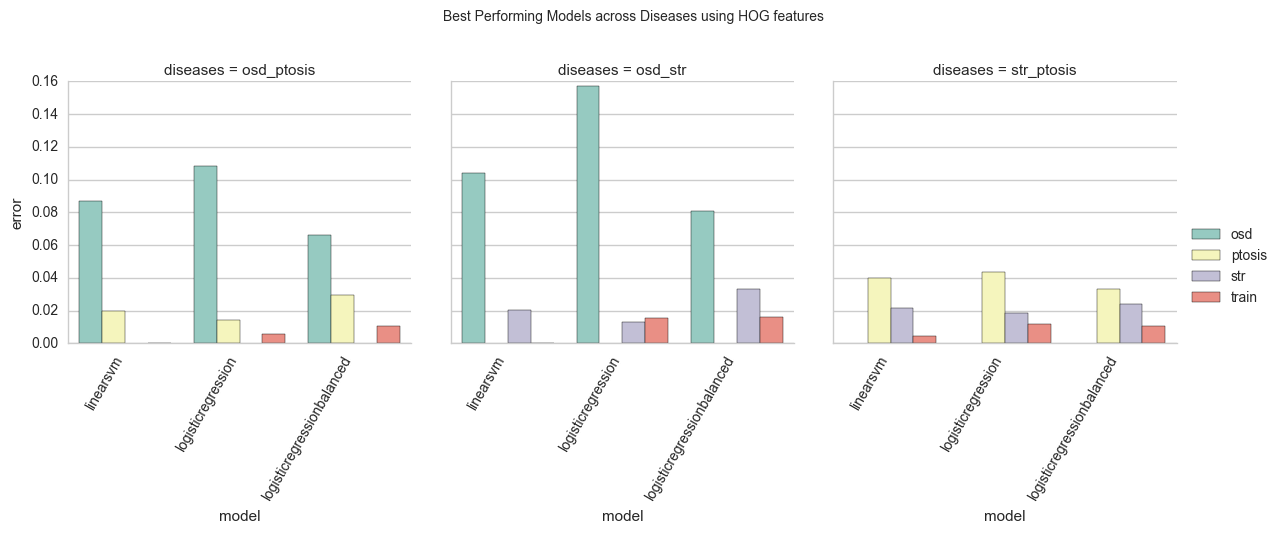

In [206]:
# BEST MODEL
best_models = data[(data.model == "linearsvm") |(data.model == "logisticregressionbalanced") |(data.model == "logisticregression")]
best_models = best_models[data.feature == "hog"]
op4 = sb.factorplot(x="model", y="error", hue="eval_set", kind="bar", col="diseases", data=best_models, legend=False,hue_order = ['osd','ptosis','str', 'train'])
op4.set_xticklabels(rotation=60, ha='right')
plt.subplots_adjust(top=0.8)
op4.add_legend(label_order = ['osd','ptosis','str', 'train'])
op4.fig.suptitle('Best Performing Models across Diseases using HOG features')
op4.savefig('output/nov19_best_models_all_diseases.png')